### 확률분포의 추정

In [1]:
# 확률분포의 결정
# 확뷸분포를 알아내는 일은 두 작업으로 나뉨
# 1. 확률변수가 베르누이,이항,정규분포 등의 기본 분포 중 어떤 확률분포를 따르는지 확인
# 2. 데이터로부터 해당 확률분포의 모수 값을 구함

# 데이터가 0,1뿐 > 베르누이
# 데이터가 카테고리 값 > 카테고리
# 0과 1사이의 실수 값 > 베타
# 0또는 양수 > 로그정규,감마,F,카이제곱,지수,하프코시
# 크기제한 없는 실수 > 정규,t,코시,라플라스

# 모수 추정 방법론
# 모수의 값으로 가장 가능성이 높은 하나의 숫자를 찾아내는 작업
# 모멘트방법, 최대가능도 추정법, 베이즈 추정법

# 모멘트 방법
# 표본자료에 대한 표본모멘트가 확률분포의 이론적 모멘트와 같다고 가정하고 모수를 구함

### 최대가능도 추정법

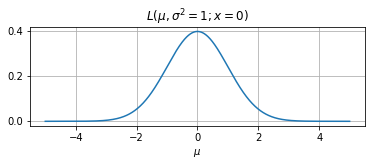

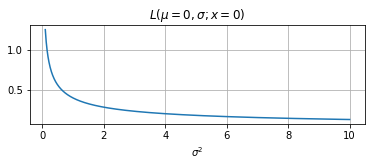

C:\Users\user\AppData\Local\Temp\ipykernel_11552\3184794320.py:30: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


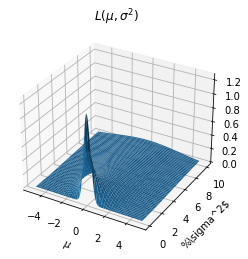

In [2]:
# 가능도함수
# 모멘트방법으로 추정한 모수는 그 숫자가 가장 가능성 높은 값이라는 이론적 보장은 없음
# 따라서 가장 가능성이 높은 모수를 찾는 방법인 최대가능도 추정법을 확인
# 먼저 여러가지 확률분포 X에 대한 확률밀도함수를 p(x;θ)로 표현
# 만약 베르누이분포면 θ=μ, 만약 확률분포가 이항분포면 θ=(N,μ), 확률분포가 정규분포라면 θ=(μ,σ^2)
# 모수 추정 문제에서는 x값은 알지만 θ는 변수인 상태 이렇게 확률밀도함수에서 모수를 변수로 보는 경우를 가능도 함수라고함
# L(θ;x) 가능도함수 =p(x;θ)확률밀도함수
# 확률밀도함수는 변수가 x지만 가능도함수는 변수가 모수가 됨.
# 따라서 정규분포 같은경우 모수를 μ,σ^2로 2개이기에 가능도함수에서 변수가 2개로 다변수 함수가 됨
import scipy as sp; import scipy.stats; import numpy as np; import matplotlib.pyplot as plt
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)
mus=np.linspace(-5,5,1000)
likelihood_mu=[likelihood_mu(m) for m in mus]
plt.subplot(211); plt.plot(mus,likelihood_mu)
plt.title('$L(\mu,\sigma^2=1; x=0)$'); plt.xlabel('$\mu$')
plt.grid(True); plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)
sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]
plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2); plt.title("$L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$"); plt.grid(True); plt.show()
# L(μ,σ2) 은 이차원 함수이므로 입체로 그리면 다음과 같다
MU,SIGMA2=np.meshgrid(mus,sigma2s)
L=np.exp(-MU**2/(2*SIGMA2))/np.sqrt(2*np.pi*SIGMA2)
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(MU,SIGMA2,L,linewidth=0.1)
plt.xlabel('$\mu$'); plt.ylabel('%\sigma^2$'); plt.title('$L(\mu, \sigma^2)$')
plt.grid(True); plt.show()

# 정리해보면
# 확률밀도함수 f(x;θ)
# θ  값을 이미 알고 있음 | θ는 상수, x는 변수
# θ가 이미 정해져 있는 상황에서의 x 값의 상대적 확률 | 적분하면 전체 면적은 항상 1
# 가능도함수 L(θ)=p(x|θ)
# x 가 이미 발생. 값을 이미 알고 있음 | x는 상수, θ는 변수
# x가 이미 정해져 있는 상황에서의 θ 값의 상대적 확률 | 적분하면 전체 면적이 1이 아닐 수 있다.


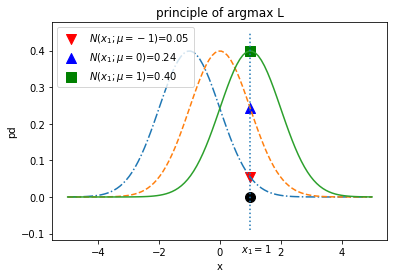

In [3]:
# 최대가능도 추정법
# 주어진 표본에 대하 가능도를 가장 크게하는 모수 θ를 찾는 방법
# 이렇게 찾은 모수는 θ.hat_MLE로 표시  θ^MLE=argmaxL(θ;x)

# 예제 분산=1을 알고 있으나 평균을 모르고 있어 이를 추정하는 문제를 생각
# 표본은 x1=1하나.
x=np.linspace(-5,5,100)
p1=sp.stats.norm(loc=-1).pdf(1); p2=sp.stats.norm(loc=0).pdf(1); p3=sp.stats.norm(loc=1).pdf(1)
plt.scatter(1,p1,s=100,c='r',marker='v',label=r"$N(x_1;\mu=-1)$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1,p2,s=100,c='b', marker='^',label=r"$N(x_1;\mu=0)$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1,p3,s=100,c='g', marker='s',label=r"$N(x_1;\mu=1)$={:.2f}".format(np.round(p3, 2)))
plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-."); plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(1-0.3, -0.15, "$x_1=1$")
plt.xlabel("x"); plt.ylabel("pd"); plt.legend(); plt.title("principle of argmax L"); plt.show()
# 여기서는 -1,0,1의 세가지 후보가 나오고 이 세가지 값에 대해 1이 나올 확률밀도의 값이 바로 가능도임.
# μ=-1이라는 확률분포에서 x=1일 가능도가 0.05, μ=0에서 가능도가 0.24, μ=1에서 가능도가 0.4
# 즉 최대 가능도 추정법에 따라 추정값은 μ^MLE=1

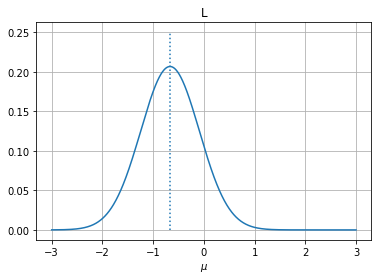

In [4]:
# 복수의 표본데이터가 있는 경우의 가능도 함수
# L(θ;x1,…,xN)=p(x1,…,xN;θ)= ∏i=1~N p(xi;θ)
# 예제 표본 데이터가 {1,0,-3}이고 정규분포인 경우
# 가능도함수는
mu=np.linspace(-3,3,1000)
sigma2=1
def likelihood(mu):
    return (2*np.pi*sigma2)**(3/2)*np.exp(-(3 * mu ** 2 + 4 * mu + 10) / (2 * sigma2)) # 근데 이거 왜 앞에 역수 취한거야 시발
li=likelihood(mu)
plt.plot(mu,li)
plt.vlines(-2/3,0,0.25,linestyles=":")
plt.xlabel(r'$\mu$'); plt.title('L'); plt.grid(True); plt.show()
#  μ^MLE=−2/3 이 나옴 근데 왜 리턴값이 처음에 역수가 되는건지 모르겠음

# 베르누이분포일때 예제
# {1,0,1}:표본데이터 > 가능도함수 p(x=1, μ)*p(x=0,μ)*p(x=1,μ)=μ(1-μ)μ=μ^2-μ^3
# 이렇게 간단한 경우는 그냥 미분한 도함수가 0이되는 지점 = 최대값 지점 을 구하면 됨
# 미분하면 μ^MLE=2/3
# 일반화시 N1을 성공 횟수, N0를 실패 횟수라 하면 logL=N1*logμ+N0*log(1-μ)
# 이를 미분시 N1/μ -N0/(1-μ)=0 , μ=N1/N
# 즉 최대가능도 추정법에 의한 베르누이 분포의 모수는 1이 나온 횟수와 전체 시행횟수의 비율 

# 로그가능도함수
# 일반적으로 최대가능도 추정법을 사용하여 계산시 수치적 최적화를 해야함
# 로그 변환에 의해서는 최대값의 위치가 변치 않고, 로그는 곱셈이 덧셈이 되어 셈이 간편해지기에 로그로 변환하여 푸는경우가 많음
# 따라서 로그가능도함수 LL=logL 을 사용
# 정규분포로 부터 얻은 표본값이 {1,0,-3}인 경우
# logL(μ;x1,x2,x3)=(logN(x1)*logN(x2)*logN(x3))=log(1/2pi^(3/2))-(3(μ+2/3)^2+26/3)/2 이고 동일하게 최대값위치가 -2/3임을 알 수 있음

# 카테고리분포의 최대가능도 모수 추정
# 모수가 μ=(μ1,..,μk)인 카테고리 분포의 확률질량함수 = Cat(x;μ1,..,μk)=∏k=1~K μk^xk
# 여기서 x는 모두 k개의 원소를 가지는 원한인코딩 벡터이므로 L(μ1,..,μk;x1,..,xk)=∏i=1~N∏k=1~K μk^(x(i,k))
# 따라서 로그가능도는 logL=logp(x1,..,xk;μ1,..,μk)=∏i=1~N∏k=1~K (x(i,k),logμk)
# = ∏k=1~K(logμk(∑i=1~N x(i,k))), k번째 원소가 나온 횟수를 Nk로 놓으면
# logL=∑k=1~K (logμk*Nk) 근데 여기서 ∑k=1~K μk =1이므로 라그랑주 승수법을 이용하여 제한조건을 추가한 목적함수가 생김
# J=∑k=1~K log(μk^Nk)+λ(1−∑k=1~K μk) 이를 미분하여 0이되는 값을 찾으면 됨
# μk=Nk/N 즉 최대가능도 추정법에 의한 카테고리분포의 모수는 각 범주값이 나온 횟수와 전체 시행횟수의 비율

# 정규분포의 최대가능도 모수 추정
# 똑같이 로그화시켜 일반식을 구하면 logL=−N/2*log(2π(σ^2)) −1/(2(σ^2))*∑i=1~N(xi−μ)^2
# 미분해보면 μ=1/N*∑i=1~N xi, σ^2=1/N*∑i=1~N (xi−μ)^2
# 즉 최대가능도 추정법에 의한 정규분포의 기댓값은 표본평균, 분산은 (편향)표본분산과 같다.

# 다변수정규분포의 최대가능도 모수 추정
# 너무 복잡해서 결론만 작성함
# 최대가능도 추정법에 의한 다변수정규분포의 기댓값=표본평균벡터,분산=표본공분산행렬


### 베이즈 추정법

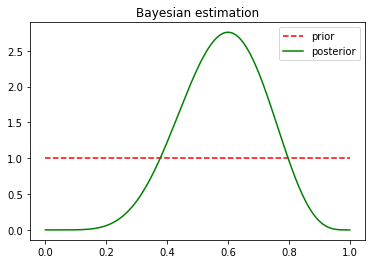

prior estimate = none
try1:mode=0.64
try2:mode=0.69
try3:mode=0.65


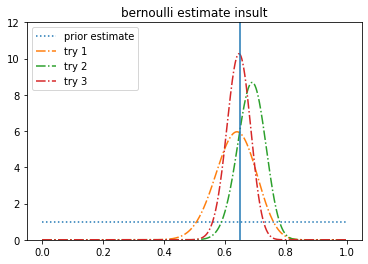

In [5]:
# 베이즈 추정법
# 모숫값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업

# 베이즈 추정법의 기본 원리
# 주어진 데이터{x1,..,xn}를 기반으로 모수μ 의 조건부 확률분포 p(μ|x1,…,xN)를 계산하는 작업
# 따라서 베이즈 정리를 사용
# 여기서 p(μ)는 모수의 사전 분포임. 이러한 지식이 없는경우는 균일분포 Beta(1,1) 혹은 정규분포(0,분산)등의 무정보분포를 사용
# p(μ∣x1,…,xN) 는 모수의 사후(Posterior)분포. 수학적으로는 조건부 분포라고 보면 됨 우리가 구하고자하는 분포임
# p(x1,…,xN∣μ) 는 가능도(likelihood)분포. 모수 μ가 특정한 값으로 주어졌을 때 주어진 데이터 {x1,…,xN}가 나올 수 있는 확률값을 나타냄.

# 계산된 모수의 표현방법
# 1. 모수적방법: 다른 확률분포를 사용해 추정된 모수의 분포를 나타냄 모수 분포를 표현하는 확률분포함수의 모수를 하이퍼 모수라하는데 이를 계산하는 작업
# 2. 비모수적방법: 모수의 분포와 동일한 분포를 가지는 실제 표본 집합을 생성하여 분포표현.

# 베르누이분포의 모수 추정
# 베르누이분포의 모수는 0~1사이 값이므로 사전 분포는 하이퍼모수 a=b=1인 베타분포로 가정
# p(μ)∝μ^(a−1)*(1−μ)^(b−1), p(x1,…,xN∣μ)=∏i=1~N μ^xi*(1−μ)^(1−xi)
# 베이즈정리에 따라 p(μ∣x1,…,xN)∝p(x1,…,xN∣μ)p(μ), =μ^(N1+a−1)*(1−μ)^(N0+b−1) 갱신된 하이퍼 모수값 a'=N1+a, b'=N0+b
# 이를 동전던지기에 적용하면 10번던져서 앞면이 6번 나온경우
# 사후분포는 하이퍼모수 a'=7,b'=5를 갖는 베타분포가 된다.
xx=np.linspace(0,1,1000)
a0,b0=1,1; a1,b1=7,5
plt.plot(xx,sp.stats.beta(a0,b0).pdf(xx),c='r',ls='--',label='prior')
plt.plot(xx,sp.stats.beta(a1,b1).pdf(xx),c='g',ls='-',label='posterior')
plt.legend(); plt.title('Bayesian estimation'); plt.show()

# 베이즈 추정법은 순차적으로 계산이 가능한것이 큰 장점. 베이지안관점은 데이터 누적과 상관이 없기에 정해진 크기의 데이터를 반복 측정하면 되지만
# 최대가능도 추정법은 데이터가 쌓일수록 누적하여 연산하기에 계산량과 계산시간이 크게 증가함. 따라서 베이즈 추정법은 계산량 증가없이 빠르게 연산가능
mu0=0.65; a,b=1,1; print('prior estimate = none')
xx=np.linspace(0,1,1000)
plt.plot(xx,sp.stats.beta(a,b).pdf(xx),ls=':',label='prior estimate')
np.random.seed(0)
for i in range(3):
    x=sp.stats.bernoulli(mu0).rvs(50)
    N0,N1=np.bincount(x,minlength=2)
    a,b=a+N1,b+N0 # N0,N1이 순서가 반대임 확인해보면
    plt.plot(xx,sp.stats.beta(a,b).pdf(xx),ls='-.',label='try {}'.format(i+1))
    print('try{}:mode={:4.2f}'.format(i+1,(a-1)/(a+b-2)))
plt.vlines(x=0.65,ymin=0,ymax=12); plt.ylim(0,12); plt.legend()
plt.title('bernoulli estimate insult'); plt.show()


In [6]:
# 카테고리분포의 모수 추정
# 클래스 개수가 K인 카테고리분포의 모수 벡터를 베이즈 추정법으로 추정
# 카테고리분포의 모수의 각 원소는 모두 0~1사이 값이므로 사전 분포는 하이퍼모수 ak=1인 디리클리 분포로 가정
# ∏k=1~K μk^(αk−1) ,(αk=1, for all k),  p(x1,…,xN∣μ)=∏i=1~N∏k=1~K μk^(x(i,k))
# p(μ∣x1,…,xN)∝p(x1,…,xN∣μ)p(μ)이므로 = ∏i=1~N∏k=1~K μk^(x(i,k))*∏k=1~K μk^(αk−1) = ∏k=1~K μ^(Nk+αk−1) = ∏k=1~K μ^(α′k−1)
# 갱신된 하이퍼 모수값은 α′k=Nk+αk

estimate try 1: 1.98
estimate try 2: 2.03
estimate try 3: 2.00
estimate try 4: 1.95


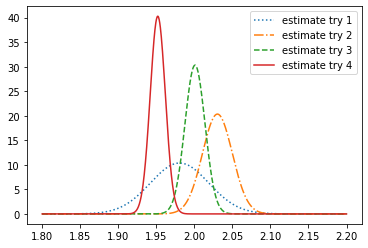

In [7]:
# 정규분포의 기댓값 모수 추정
# 분산 모수를 알고 있다고 가정하고 추정했을때 기댓값은 모든 수가 가능하기에 사전 분포로 정규분포를 이용한다
# 데이터는 모두 독립적인 정규분포의 곱이므로 가능도 함수는 다음과 같음
# p(μ∣x1,…,xN)∝p(x1,…,xN∣μ)p(μ) 여기서 p(x1,…,xN∣μ)=∏i=1~N N(xi∣μ) = ∏i=1~N (1/sqrt(2π(σ^2)))*exp(−(xi−μ)^2/(2*σ^2))
# 따라서 p(μ∣x1,…,xN)∝exp(−(μ−μ′0)^2/(2*σ′0^2))
# μ′0= σ^2/(N*σ0^2+σ^2)*μ0+ N*σ0^2/(N*σ0^2+σ2)*∑xi/N, 1/σ'0^2= 1/σ0^2 + N/σ^2

# 예제 실제 기대값=2, 분산=4 인 정규분포에서 나온데이터 차수별로 100개 사용
mu,sigma2=2,4; mu0,sigma20=0,1
xx=np.linspace(1.8,2.2,1000)
np.random.seed(0); N=100
ls=[':','-.','--','-']
for i in range(4):
    x=sp.stats.norm(mu).rvs(N)
    mu0=sigma2/(N*sigma20+sigma2)*mu0+\
        (N*sigma20)/(N*sigma20+sigma2)*x.mean()
    sigma20=1/(1/sigma20+N/sigma2)
    plt.plot(xx,sp.stats.norm(mu0,sigma20).pdf(xx),ls=ls[i],label='estimate try {}'.format(i+1))
    print('estimate try {}: {:4.2f}'.format(i+1,mu0))
plt.legend(); plt.show()

### 검정과 유의확률

In [8]:
# 검정과 유의확률
# 검정: 데이터 뒤에 숨어있는 확률변수의 분포에 대한 가설이 맞는지 틀리는지 정량적으로 증명하는 작업
# 예제 동전 15번 던져서 12번 앞면이 나왔을 때 이 동전은 조작되지 않은 공정한 동전이 맞는가
#   모수 추정시 12/15로 0.8이라는 수치가 나옴. 추정값이므로 조작되었는지 확실하지는 않음 어떻게 증명할까?

# 가설과 검정
# 데이터를 특정한 확률분포를 가진 확률변수로 모형화하면 모수를 추정가능.
# 다음으로는 데이터 뒤에 숨어있는 확률변수가 정말 그 모수값을 가졌는지 검증해야함
# 확률분포에 대한 주장을 가설 H라고 하며 이 가설을 증명하는 행위를 통계적 가설검정을 줄여 검정이라 함.

# 귀무가설
# 검정 작업을 위해 데이터가 어떤 확률변수의 표본이라고 가정하고 확률변수가 따르는 확률변수의 모수값이 특정 실수값으로 고정되어 있다고 가정함.
# 이러한 가설을 귀무가설이라 하며 H0으로 표기. 확률분포를 특정상태로 고정해야 하므로 반드시 등식으로 표현되야함
# 특정한 실수값 θ0는 증명하고자 하는 가설에 대한 기준값이 되는 상수를 사용
# 예제 동전의 경우 H0:μ=0.5, 주식 수익률의 경우 H0:μ=0

# 대립가설
# 귀무가설이 기준점이 되는 상태라면 우리가 주장하려는 혹은 반박하려는 가설을 대립가설이라함
# Ha로 표기
# 보통 연구가설이라고도 하며 증명하고자 하는 가설을 대립가설로 많이 놓음.
# 귀무가설과 대립가설이 반드시 여집합관계는 아님

# 검정통계량
# 귀무가설이 맞거나 틀렸음을 증명하려면 증거가 있어야함 이 증거의 수치가 검정통계량이 됨
# 예제 장학금을 받을 수 있는 우등생 > 시험성적을 측정 = 검정통계량
# 보통 t로 나타내며 표본 데이터 집합을 입력으로 계산되는 함수의 값임 t = f(x1,..,xn)
# 검정통계량 t도 새로운 확률변수가 됨
# 입력데이터인 확률변수 X의 확률분포함수p(x)와 검정통계량 수식 f(x)가 이미 결정되어 있기에
# 검정통계량 확률변수 T의 확률분포함수p(t)도 수식으로 유도할 수 있다
# but 유도과정이 ㅈㄴ어렵기에 미리 구해져있는 검정통계량 확률분포만 사용한다.

# 베르누이분포 확률변수
# 전체시도횟수N번중 성공횟수n자체를 검정통계량으로 쓸 수 있음
# t=∑i=1~N x ∼Bin(t;N,μ)

# 분산 값을 알고 있는 정규분포 확률변수
# 표본평균 m을 분산으로 정규화한 값을 검정통계량으로 쓴다. 이는 표준정규분포를 따르며 z로 표기한다
# z=(x.mean-μ)/σ/sqrt(N) > N(z;0,1)

# 분산 값을 모르는 정규분포 확률변수
# 모수검정의 경우 표본평균 m을 표본분산 s로 정규화한 값을 검정통계량으로 씀 이는 자유도 N-1인 표준t분포를 따름
# t=(m−μ)/s/sqrt(N) > t(t;0,1,N-1)
# 분산 검정의 경우 표본분산을 정규화한 값을 검정통계량으로 씀 이는 자유도가 N-1인 카이제곱분포를 따름
# t=(N-1)*s^2/σ^2 > x^2(t;N-1)

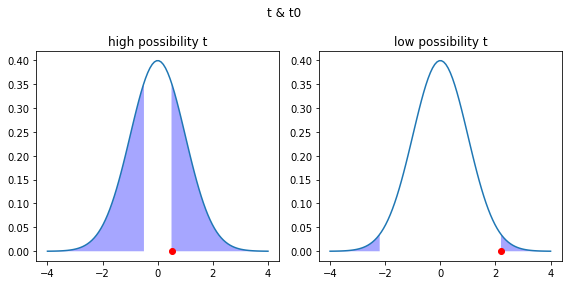

In [14]:
# 유의확률
# 검정통계량 t의 확률분포와 실제 데이터에 구한 t0값을 알고있는 경우
# 귀무가설이 사실이라면 실제 데이터에서 구한 t0값은 검정통계량의 확률분포를 따르고있으므로 기댓값이나 모드값 근처 값이 나올것
# 반대로 귀무가설이 거짓이라면 t0값은 실제 t값에서 나오기 어려운 값이 나올것

# 여기서 해당 확률분포에서 나오기 쉬운 값인지 어려운 값인지를 숫자로 정량화함이 유의확률
# 유의확률값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리부분에 해당하는 영역의 면적
# 유의확률=2min(P(t<=t0),P(t>=t0)) = 2min(F(t0),1-F(t0)) (양측검정)
xx1=np.linspace(-4,4,100)
black={'facecolor':'black'}
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('high possibility t'); plt.plot(xx1,sp.stats.norm.pdf(xx1)); plt.plot(0.5,0,'ro')
xx2=np.linspace(-4,-0.5,100); xx3=np.linspace(0.5,4,100)
plt.fill_between(xx2,sp.stats.norm.pdf(xx2),facecolor='blue',alpha=0.35)
plt.fill_between(xx3,sp.stats.norm.pdf(xx3),facecolor='blue',alpha=0.35)
plt.subplot(122)
plt.title('low possibility t'); plt.plot(xx1,sp.stats.norm.pdf(xx1)); plt.plot(2.2,0,'ro')
xx2=np.linspace(-4,-2.2,100); xx3=np.linspace(2.2,4,100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.suptitle('t & t0'); plt.tight_layout(); plt.show()
# 검정의 관점에서 유의확률은
# 귀무가설이 맞음에도 불구하고 현재 검정통계량값과 같은 혹은 대립가설을 더 옹호하는 검정통계량이 나올 확률
# P(t for Ha|H0) 여기서 H0는 귀무가설이 진실인 사건을 의미

In [ ]:
# 단측검정 유의확률
# 증명하고자 하는 대립가설이 부등식인 경우
# 모수θ가 특정값보다 크다는 것을 증명하고 싶은 경우
# H0:θ =θ0, Ha:θ >θ0 이는 우측검정 사용 > 유의확률=1-F(t0)
# 모수θ가 특정값보다 작다는 것을 증명하고 싶은 경우는 반대로 좌측검정 사용 유의확률=F(t0)

# 유의수준과 기각역
# 유의확률값이 작다는 것은 귀무가설이 맞다는 가정하에 현재의 t가 나올 가능성이 매우 적다는 뜻
# 따라서 유의확률값이 아주 작은경우 귀무가설을 기각하고 대립가설을 채택가능
# 여기서 아주 작다의 기준값으로 사용되는게 유의수준. 1%,5%,10% 등을 일반적으로 사용
# 유의수준에 대해 계산된 검정통계량을 기각역이라 함
# 기각역을 알고 있다면 유의확률을 유의수준과 비교하는 것이 아니라 검정통계량을 직접 기각역과 비교하여 기각여부 판단가능

### scipy를 사용한 검정

In [50]:
# 이항검정
# 이항분포를 이용하여 베르누이 확률변수의 모수에 대한 가설을 조사하는 검정 방법
# sp.stats.binom_test(x,n=None,p=0.5,alternative='two-sided')
# x:검정통계량(1이 나온 횟수), n:총 시도횟수, p:귀무가설의 모수값, alternative:양측검정은 two-sided 단측은 less or greater
# 확실한건 아닌데 검정통계량은 대립가설을 긍정하는 방향의 횟수가 들어가는듯? > 대립가설이 담배안피는놈이 더 적다면 안피는놈 인원수가 들어가는 느낌
# 예제 자격증시험 합격자가 10명중 7명은 대졸,3명은고졸. '대졸이 고졸보다 실력이 좋다' 검증
N=10; p=0.5; n=7 # 실력이 동일함을 귀무가설로 둠
sp.stats.binom_test(n,N) # 유의확률0.34 즉 실력이 비슷함. 따라서 '대졸이 고졸보다 실력이 좋다'는 거짓

# 카이제곱검정
# 카테고리분포는 통계량이 벡터이기 때문에 모수검정을 위해 카이제곱검정을 사용
# 범주형 확률분포의 모수μ=(μ1,…,μK)에 대한 가설을 조사하는 검정 방법으로 적합도검정이라 부른다
# 원래 범주형 값 k가 나와야할 횟수의 기대값 mk와 실제 나온 횟수 xk의 차이를 이용하여 검정통계량을 구한다.
# ∑k=1~K (xk−mk)^2/mk
# sp.stats.chisquare(f_obs,f_exp=None) , f_obs:데이터 행렬, f_exp:기댓값 행렬(안넣어도 되는듯 함)
# 예제 주사위 던지기 5번던졌는데 모두 6나온 경우 주사위가 공정하다는 귀무가설의 유의확률은?
d=[0,0,0,0,0,5]; sp.stats.chisquare(d) # 귀무가설 0.014% 따라서 공정하지 않음

# 카이제곱 독립검정
# 카이제곱검정은 어떤 범주형 확률변수 X가 다른 번주형 확률변수 Y와 독립인지 상관관계인지 검증하는데도 사용가능
# 카이제곱검정을 독립확인 하는데 사용하는 방법
# 만약 P(x,y)가 다음과 같다면 독립임
import pandas as pd
index=['P(X=0)=0.4','P(X=1)0.6']; column=['P(Y=0)=0.3','P(Y=1)=0.7']; values=[[0.12,0.28],[0.18,0.42]]
df=pd.DataFrame(values,index=index,columns=column); df
# 이런 확률변수의 표본을 측정하여 그 횟수를 표로 나타낸 것을 분할표라함.
# 분할표가 만약 개같이 나오면 독립이라고 할 수 있을까? 이를 카이제곱검정을 사용하여 품
# 만약 두 확률변수가 독립이라면 X=0과 X=1의 Y분포가 같아야함 기각된다면 상관관계가 있는것
# sp.stats.chi2_contingency(obs), obs:분할표
obs=np.array([[5,15],[10,20]]); sp.stats.chi2_contingency(obs) # 여러 결과값이 나오는데 첫번째 값이 검정통계량, 두번째 값이 유의확률임
# 여기서는 유의확률이 75%가 나오므로 상관관계라 할 수 있음

(9.910060890453046,
 0.00704786570249751,
 2,
 array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


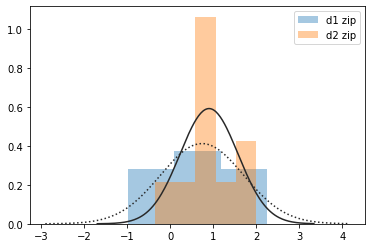

0.7380231707288347 0.9006460151624349


Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

In [73]:
# 단일표본 z검정
# 분산의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법 > 귀무가설 μ=0
# 거의 사용되지 않아서 매서드가 없음 직접 구현해야함 ㅅㅂ
N=10; mu0=0; np.random.seed(0)
x=sp.stats.norm(mu0).rvs(N) # 실제 기대값0,분산1인 경우 랜덤 표본
def ztest_1samp(x,sigma2=1,mu=0):
    z=(x.mean()-mu)/np.sqrt(sigma2/len(x))
    return z,2*sp.stats.norm().sf(np.abs(z))
ztest_1samp(x) #검정통계량, 유의확률
# 위의 예제의 경우 귀무가설이 참임에도 불구하고 데이터개수인 N이 부족하여 귀무가설이 기각되었음
# 이를 1종오류 라고함.
# 1종오류는 유의확률은 유의수준보다 작으며, 귀무가설은 진실이여야 함.
# 1종오류가 나올 확률은 유의수준과 같음

# 단일표본 t검정
# 정규분포의 표본에 대해 기댓값을 조사하는 검정방법 > μ=0이 귀무가설
# (x.mean-μ0)/s/sqrt(N)
# sp.stats.ttest_1samp(a,popmean) a:표본 데이터 배열, popmean:귀무가설의 기댓값
N=100; mu0=0; np.random.seed(0)
x=sp.stats.norm(mu0).rvs(N); sp.stats.ttest_1samp(x,popmean=0)
# 마찬가지로 검정통계량, 유의확률 도출 이것도 N이 적으면 1종오류에 걸릴 수 있음

# 독립표본 t검정
# 두 개의 독립적인 정규분포에서 나온 N1,N2개의 데이터 셋을 이용해 두 정규분포의 기댓값이 동일한지 검사
# > 귀무가설이 두 정규분포의 기댓값이 동일함으로 설정됨
# 검정통계량(두 정규분포의 분산이 같은경우) t= (x1.mean-x2.mean)/(s*sqrt(1/N1+1/N2))
# 여기서 s=sqrt(((N1-1)*s1^2+(N2-1)*s2^2)/(N1+N2-2)) 이 통계량은 자유도가 N1+N2-2인 t분포를 따름
# 검정통계량(두 정규분포의 분산이 다른경우) t= (x1.mean-x2.mean)/sqrt(s1^2/N1+s2^2/N2)
# 이 값은 자유도(dof)가 대충 존나 복잡한 t분포를 따른다
# sp.stats.ttest_ind(a,b,equal_var=True) a:1번 표본집합 데이터, b:2번 표본집합 데이터, equal_var:분산동일여부
# 예제
# 두 정규분포의 기댓값이 0,0.5이고 분산은 1로 같으며 표본의수가 10인 경우
import seaborn as sns
N1=N2=10; mu1,mu2=0,0.5; sigma1=sigma2=1; np.random.seed(0)
x1=sp.stats.norm(mu1,sigma1).rvs(N1); x2=sp.stats.norm(mu2,sigma2).rvs(N2)
ax=sns.distplot(x1,kde=False,fit=sp.stats.norm,label='d1 zip')
ax=sns.distplot(x2,kde=False,fit=sp.stats.norm,label='d2 zip')
ax.lines[0].set_linestyle(':'); plt.legend(); plt.show()
print(np.mean(x1),np.mean(x2)) # 표본평균이 다름
sp.stats.ttest_ind(x1,x2,equal_var=True) # 하지만 검정결과는 유의확률 68% 로 두 기댓값이 같음
# 이런경우 귀무가설이 거짓임에도 불구하고 진실로 나옴 = 2종오류
# 데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다. N1,N2를 50으로 증가시키고 실행시 발생하지 않음을 확인할 수 있음

# 대응표본 t검정
# 독립표본 t검정을 두 집단의 표본이 1대1 대응하는 경우에 대해 수정한 것
# = 두 정규분포의 기댓값이 같은지 확인 > 같다 = 귀무가설
# t= (xd.mean-μ0)/sd/sqrt(N) , xd=x(i,i)-x(i,2)
# sp.stats.ttest_rel(a,b) a:1번 표본집합 데이터, b:2번 표본집합데이터
# μ1 = 0 -> 0.4 로 평균이 달라진 경우에 대해 대응표본 t검정, N=5
N=5; mu1=0; mu2=0.4; np.random.seed(1)
x1=sp.stats.norm(mu1).rvs(N); x2=x1+sp.stats.norm(mu2,0.1).rvs(N) # x2설정 방법이 왜 이렇게 한건지 모르겠네
sp.stats.ttest_rel(x1,x2) # 유의확률 0.48%로 귀무가설 기각. 즉 평균이 다름

In [ ]:
# 등분산검정
# 독립표본 t검정(ttest_ind)를 사용하기 위해서는 두 데이터 집합의 분산이 같은지 알아야 함
# 두 정규분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규분포의 분산 모수가 같은지 확인하는 검정
# bartlett, fligner, levene 검정을 주로 사용 - 서로 다른 값이 나올 수 있음
# sp.stats.~(x1, x2)로 사용 3개 다해보고 과반인쪽이 맞는걸로 결정하는듯

# 정규성검정
# 회귀 분석 등에서는 확률분포가 정규분포를 따르는지 아닌지 확인하는 것이 중요함
# 이를 검정하는 것이 정규성검정
# 콜모고로프-스미르노프 검정 sps.stats.ks_2samp
# 샤피로-월크 검정 scipy.stats.shapiro, 엔더스-달링 검정 scipy.stats.anderson, 다고스티노 K-제곱 검정 scipy.stats.mstats.normaltest